Implement the intensity transformation

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

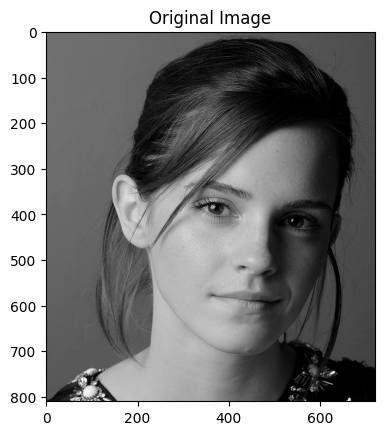

In [46]:
# Read the image
image = cv2.imread('a1images/emma.jpg', 0) 
assert image is not None    # Check if the image exists

#plot the orginal image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


(256,)


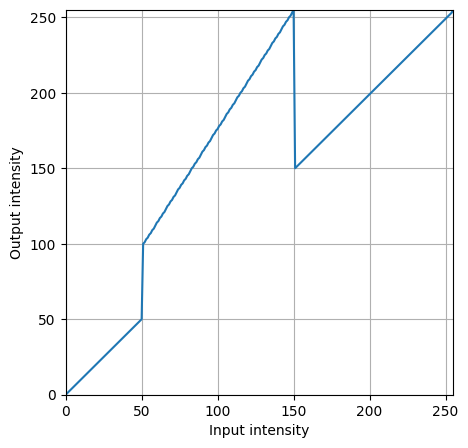

In [47]:
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate the arrays
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

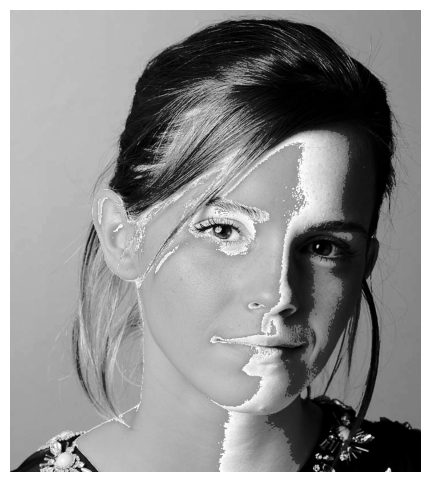

In [48]:
# Apply the transformation
f = t[image]

# plot the image
plt.figure(figsize=(6, 6))
plt.imshow(f, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Question 2

In [49]:
# Read the image in grayscale
brain_image = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
assert brain_image is not None

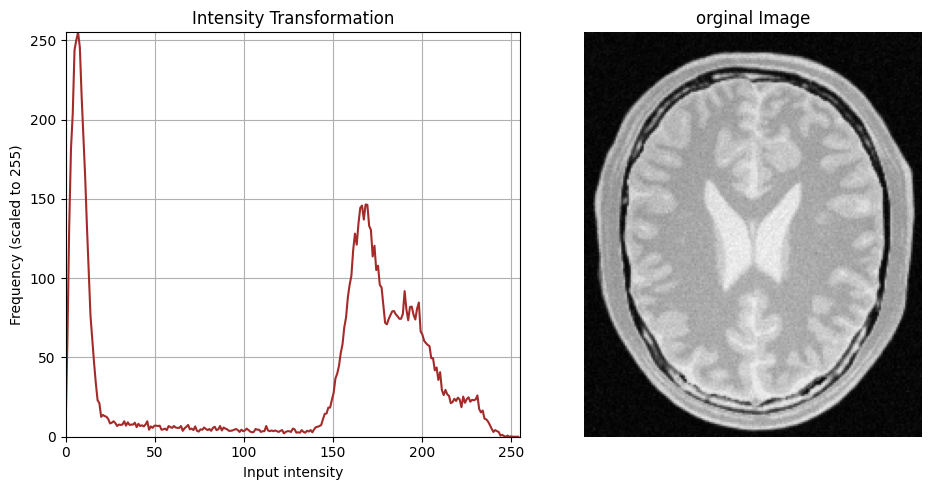

In [50]:
histogram, bin_edges = np.histogram(brain_image, bins=256, range=(0, 255))

# Normalize the histogram if you want the values between 0 and 255 (optional)
histogram = histogram / histogram.max() * 255

fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the intensity transformation curve on the first subplot
ax[0].plot(bin_edges[0:-1], histogram, color='brown')  # bin_edges gives the intensity values, histogram gives frequency
ax[0].set_xlabel("Input intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_ylabel("Frequency (scaled to 255)")
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

# Display the transformed image on the second subplot
ax[1].imshow(brain_image, cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')  # Hide axes for the image
ax[1].set_title("orginal Image")

# Show both plots side by side
plt.tight_layout()  # Adjusts spacing between the plots
plt.show()

In [65]:
mu = 255
sigma = 25
x = np.linspace(0, 255, 256)
t1 = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t1 = np.clip(t1, 0, 255)

print(t1.shape)



(256,)


white

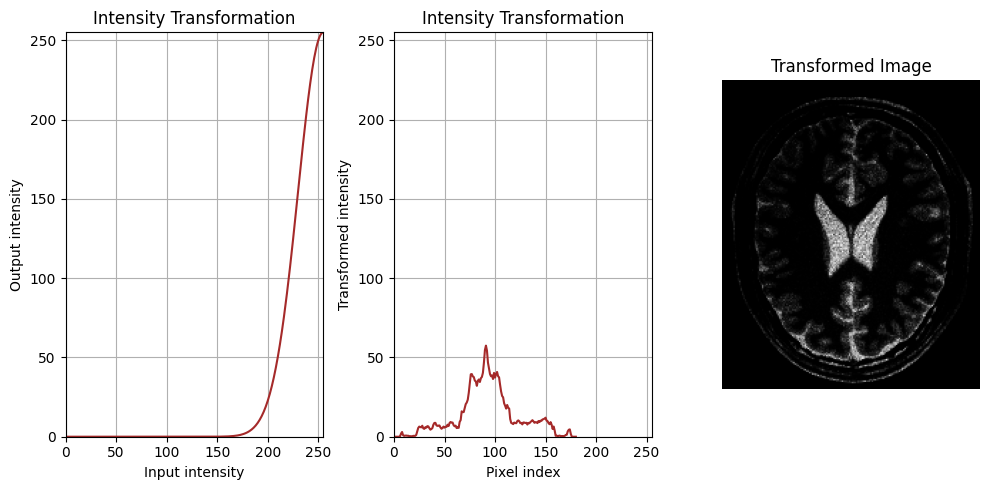

In [67]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, ax = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 2 columns, 10x5 inch figure

# Plot the intensity transformation curve on the first subplot
ax[0].plot(t1, color='brown')
ax[0].set_xlabel("Input intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_ylabel("Output intensity")
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")


transformed_intensity = (t1[brain_image]/np.max(t1[brain_image])) * 255

# Plot the normalized intensity transformation curve on the first subplot
ax[1].plot(np.mean(transformed_intensity, axis=0), color='brown')
ax[1].set_xlabel("Pixel index")
ax[1].set_xlim(0, 255)
ax[1].set_ylim(0, 255)
ax[1].set_ylabel("Transformed intensity")
ax[1].grid(True)
ax[1].set_title("Intensity Transformation")

# Display the transformed image on the second subplot
ax[2].imshow(t1[brain_image], cmap='gray', vmin=0, vmax=255)
ax[2].axis('off')  # Hide axes for the image
ax[2].set_title("Transformed Image")

# Show both plots side by side
plt.tight_layout()  # Adjusts spacing between the plots
plt.show()


gray


(256,)


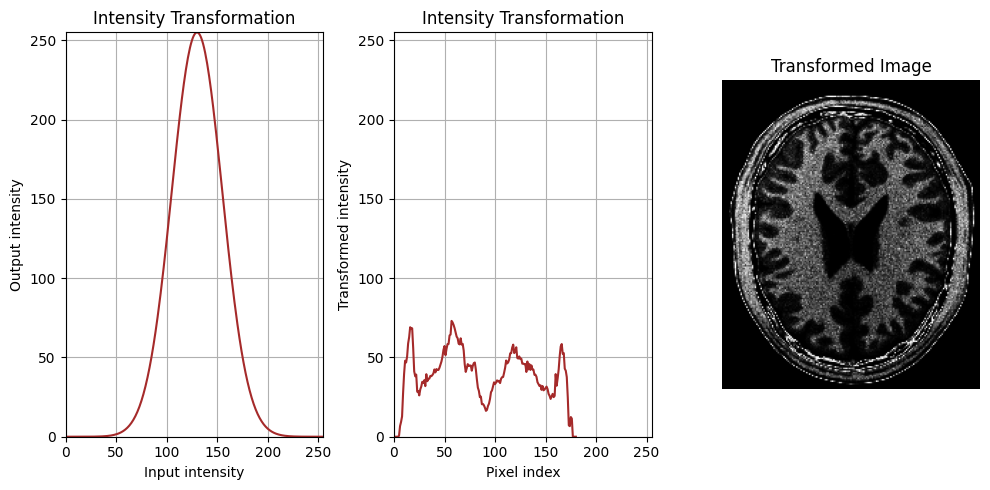

In [68]:
mu = 130
sigma = 25
x = np.linspace(0, 255, 256)
t2 = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t2 = np.clip(t, 0, 255)

print(t.shape)
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, ax = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 2 columns, 10x5 inch figure

# Plot the intensity transformation curve on the first subplot
ax[0].plot(t2, color='brown')
ax[0].set_xlabel("Input intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_ylabel("Output intensity")
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")


transformed_intensity = (t2[brain_image]/np.max(t2[brain_image])) * 255

# Plot the normalized intensity transformation curve on the first subplot
ax[1].plot(np.mean(transformed_intensity, axis=0), color='brown')
ax[1].set_xlabel("Pixel index")
ax[1].set_xlim(0, 255)
ax[1].set_ylim(0, 255)
ax[1].set_ylabel("Transformed intensity")
ax[1].grid(True)
ax[1].set_title("Intensity Transformation")

# Display the transformed image on the second subplot
ax[2].imshow(t2[brain_image], cmap='gray', vmin=0, vmax=255)
ax[2].axis('off')  # Hide axes for the image
ax[2].set_title("Transformed Image")

# Show both plots side by side
plt.tight_layout()  # Adjusts spacing between the plots
plt.show()





Question 3

In [7]:
# Read the image in grayscale
shadows_image = cv2.imread("a1images/highlights_and_shadows.jpg")
assert shadows_image is not None

shadow_image = cv2.cvtColor(shadows_image, cv2.COLOR_BGR2LAB)

(np.float64(-0.5), np.float64(719.5), np.float64(479.5), np.float64(-0.5))

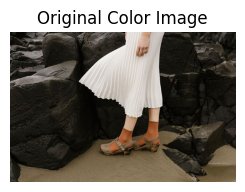

In [8]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(shadows_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

In [139]:
L,a,b = cv2.split(shadow_image)

gamma = 0.6
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
new_shadow_image = cv2.LUT(L, t)

merge_image = cv2.merge([new_shadow_image, a, b])
after_new_shadow_image= cv2.cvtColor(merge_image, cv2.COLOR_LAB2RGB)

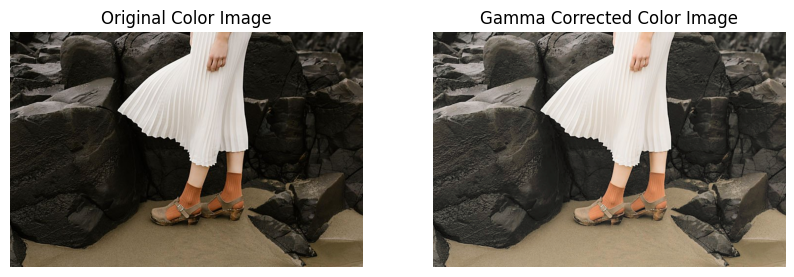

In [140]:
# Display the original and corrected images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(shadows_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

# Gamma corrected image
plt.subplot(1, 2, 2)
plt.imshow(after_new_shadow_image)
plt.title('Gamma Corrected Color Image')
plt.axis('off')

# Show both images
plt.show()

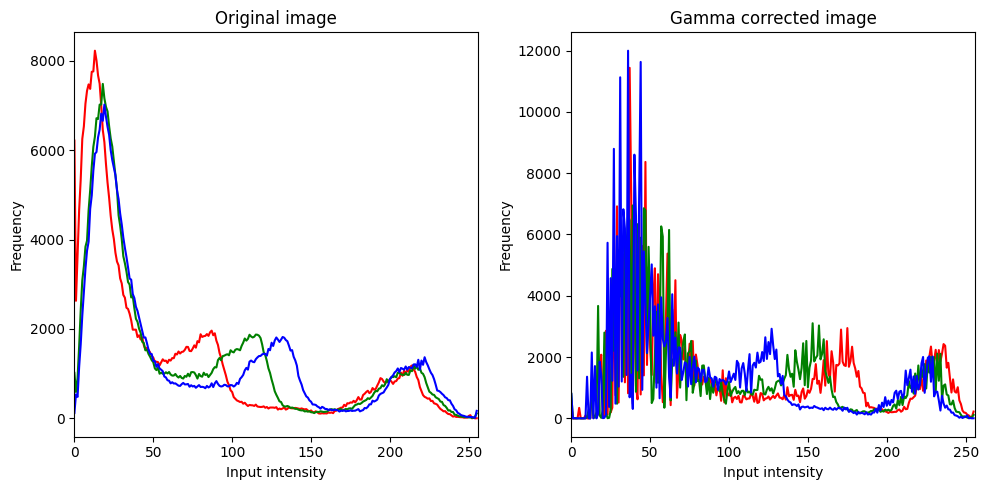

In [146]:
# Plot the histograms of the original and gamma corrected images

color = ('r', 'g', 'b')  

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
for i, col in enumerate(color):
    hist1 = cv2.calcHist([shadows_image], [i], None, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Original image')
plt.xlabel('Input intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])


plt.subplot(1, 2, 2)
for i, col in enumerate(color):
    hist2 = cv2.calcHist([after_new_shadow_image], [i], None, [256], [0, 256])
    plt.plot(hist2, color=col)
plt.title('Gamma corrected image')
plt.xlabel('Input intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Show both histograms
plt.tight_layout()
plt.show()

Question 4

In [69]:
#load image from rgb format
image = cv2.imread('a1images/spider.png')
assert image is not None

#conver from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image from RGB to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Split into Hue, Saturation, and Value channels
hue, saturation, value = cv2.split(image_hsv)

# # Display the original image
# plt.figure(figsize=(6, 6))
# plt.imshow(image_rgb)
# plt.title('Original Image')
# plt.axis('off')
# plt.show()

In [34]:
def intensity_transformation(saturation, a, sigma=70):
    # Precompute constant values
    exponent = np.exp(-((saturation - 128) ** 2) / (2 * (sigma ** 2)))
    # Apply the intensity transformation
    transformed_saturation = np.clip(saturation + a * 128 * exponent, 0, 255)
    return transformed_saturation




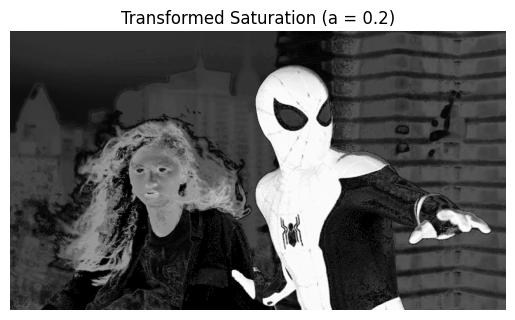

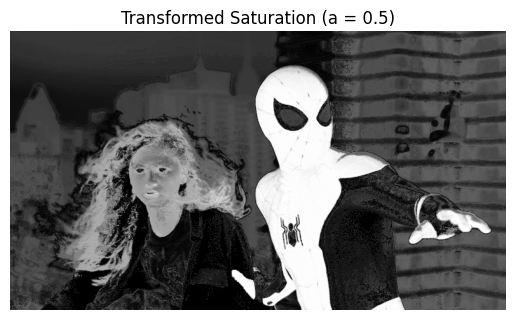

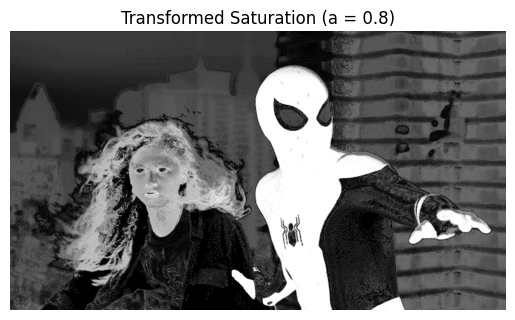

In [30]:
a_values = [0.2, 0.5, 0.8]
for a in a_values:
    transformed_saturation = intensity_transformation(saturation.astype(np.float32), a=a)
    plt.figure()
    plt.imshow(transformed_saturation, cmap='gray')
    plt.title(f'Transformed Saturation (a = {a})')
    plt.axis('off')
    plt.show()

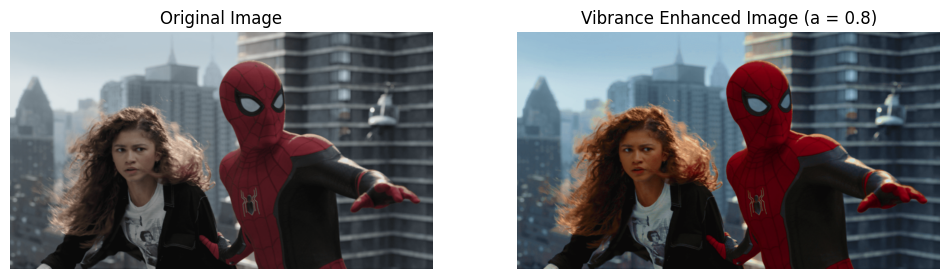

In [35]:
a_value=0.8
transformed_saturation = intensity_transformation(saturation.astype(np.float32), a=a_value)

# Recombine the transformed saturation with the original hue and value
transformed_hsv = cv2.merge([hue, transformed_saturation.astype(np.uint8), value])

# Convert the HSV image back to RGB
transformed_image_rgb = cv2.cvtColor(transformed_hsv, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Transformed (vibrance-enhanced) image
plt.subplot(1, 2, 2)
plt.imshow(transformed_image_rgb)
plt.title(f'Vibrance Enhanced Image (a = {a_value})')
plt.axis('off')

plt.show()


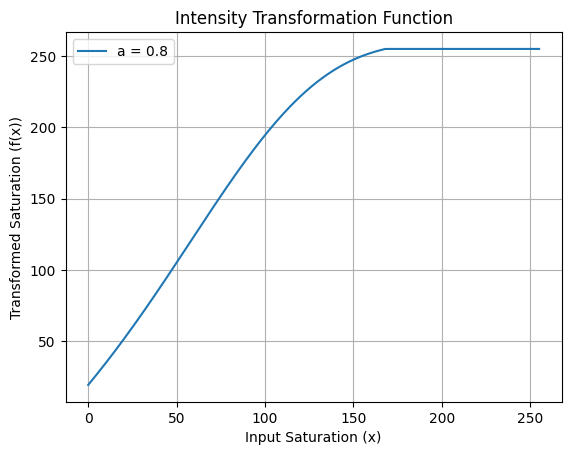

In [70]:
# Plot the intensity transformation function
x_values = np.linspace(0, 255, 256)
y_values = intensity_transformation(x_values, a=a_value)

plt.plot(x_values, y_values, label=f'a = {a_value}')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Saturation (x)')
plt.ylabel('Transformed Saturation (f(x))')
plt.legend()
plt.grid(True)
plt.show()


Question 5

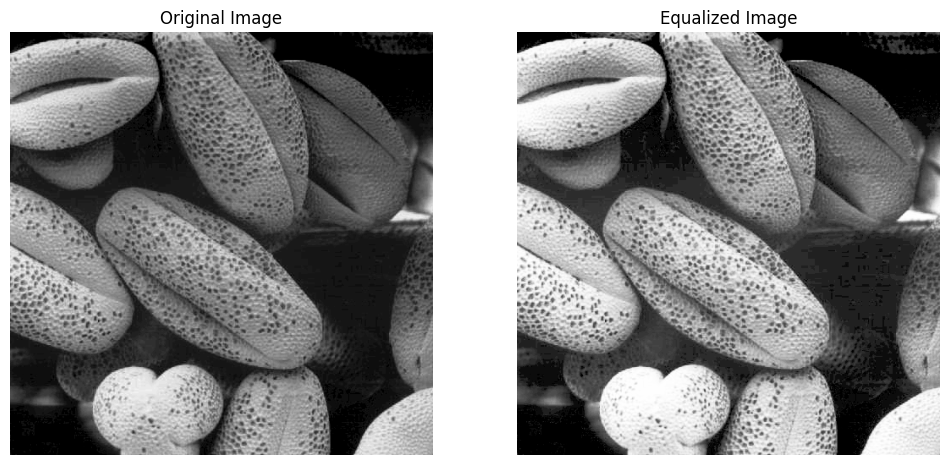

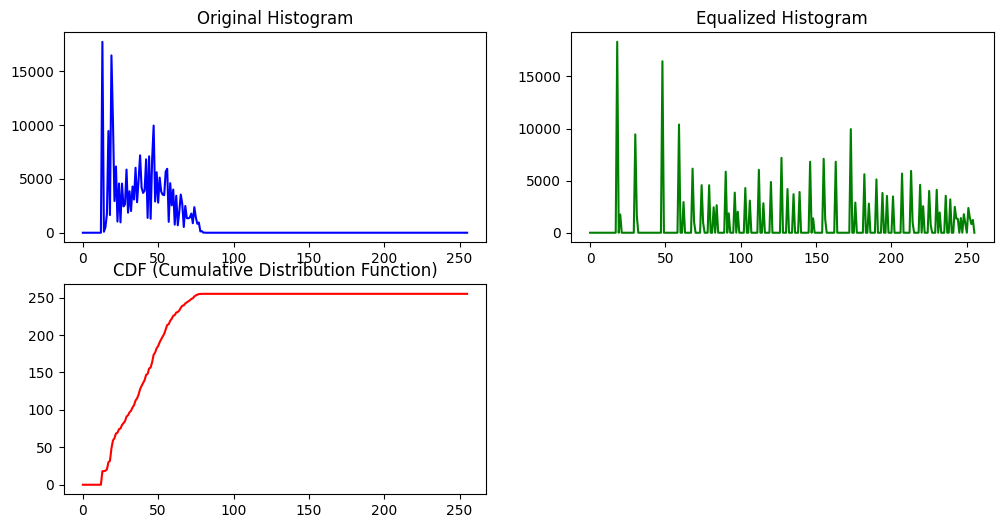

In [74]:
# Load the image in grayscale
shell_image = cv2.imread('a1images/shells.tif', cv2.IMREAD_GRAYSCALE)

# Compute the histogram of the original image
hist, bins = np.histogram(shell_image.flatten(), 256, [0, 256])

# Compute the Cumulative Distribution Function (CDF) of the histogram
cdf = hist.cumsum()

# Normalize the CDF to range [0, 255]
cdf_normalized = cdf * 255 / cdf[-1]  # cdf[-1] is the maximum value in the cumulative sum

# Apply the CDF as a mapping to the original image pixel values to get the equalized image
image_equalized = np.interp(shell_image.flatten(), np.arange(0, 256), cdf_normalized)

# Reshape the equalized image back to its original shape
image_equalized = image_equalized.reshape(shell_image.shape)

# Plot the original image and equalized image
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(shell_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(image_equalized.astype(np.uint8), cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Plot the histograms before and after equalization
plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(2, 2, 1)
plt.plot(hist, color='blue')
plt.title('Original Histogram')

# Equalized histogram
equalized_hist, _ = np.histogram(image_equalized.astype(np.uint8).flatten(), 256, [0, 256])
plt.subplot(2, 2, 2)
plt.plot(equalized_hist, color='green')
plt.title('Equalized Histogram')

# Plot CDF
plt.subplot(2, 2, 3)
plt.plot(cdf_normalized, color='red')
plt.title('CDF (Cumulative Distribution Function)')

plt.show()


Question 6

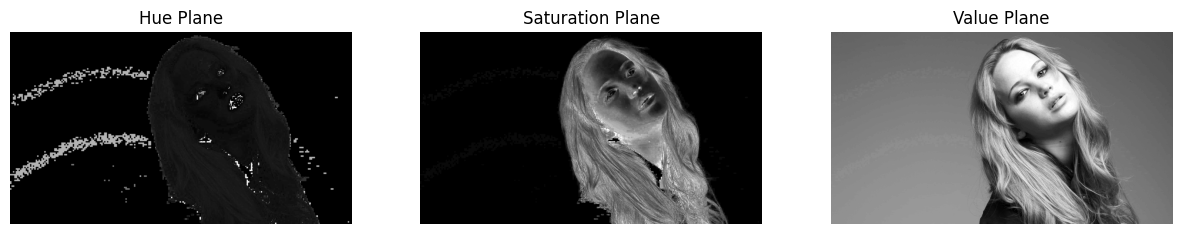

In [83]:
#open image
jeniffer_image = cv2.imread('a1images/jeniffer.jpg')
assert jeniffer_image is not None

#conver from BGR to RGB
#jeniffer_image_rgb = cv2.cvtColor(jeniffer_image, cv2.COLOR_BGR2RGB)

# Convert the image from RGB to HSV
jeniffer_image_hsv = cv2.cvtColor(jeniffer_image, cv2.COLOR_BGR2HSV)

# Split into Hue, Saturation, and Value channels
hue, saturation, value = cv2.split(jeniffer_image_hsv)

#Display the Hue, Saturation, and Value planes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.show()

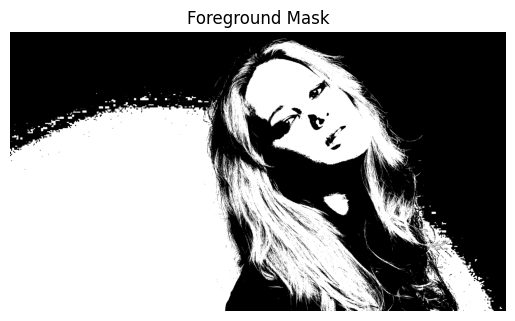

In [84]:
# Threshold the Value plane to create a mask for the foreground
_, mask = cv2.threshold(value, 120, 255, cv2.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.show()
